In [24]:
from data.dataset_builder import RecessionDatasetBuilder

builder = RecessionDatasetBuilder()

data = builder.create_data({
    "Real GDP": 3,
    "Unemployment Rate": 3
}, window=12)

In [25]:
X = data.drop(columns=["Recession"])
y = data["Recession"]

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

model = LogisticRegression(class_weight="balanced", random_state=42)
model.fit(X, y)
probas = model.predict_proba(X)[:, 1]

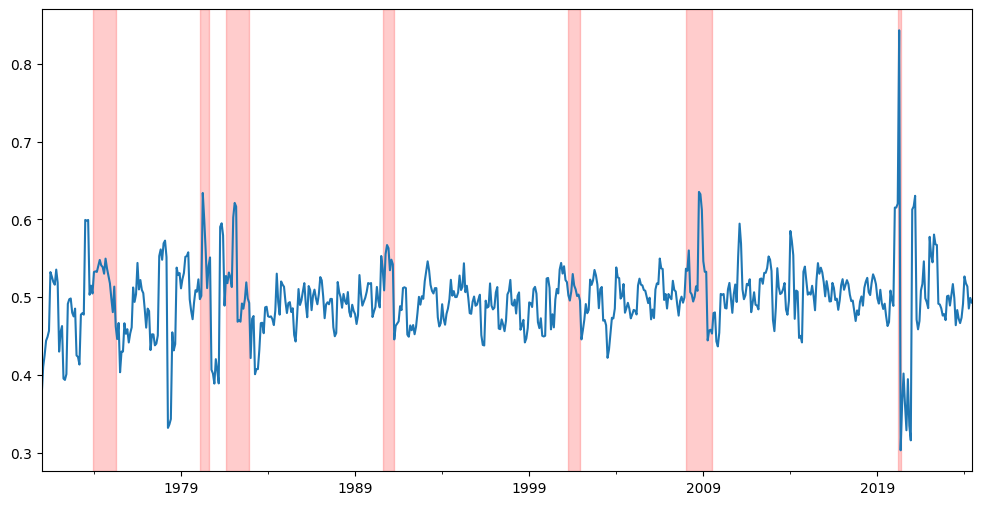

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from data.helpers import get_recessions

plt.figure(figsize=(12, 6))
pd.Series(probas, index=y.index).plot()

for start, end in get_recessions(y.index.min()):
    plt.axvspan(start, end, color="red", alpha=0.2)

plt.show()